In [24]:
import librosa
import numpy as np
import IPython
import pandas as pd
import sys
import os 
import warnings
import time

#we will see it later.
import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

import np_utils

#importing librarys

In [346]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score #computes F1 score
from sklearn.metrics import accuracy_score #compute accuracy
# to play the audio files
from IPython.display import Audio

from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [347]:
import os
import pandas as pd

In [348]:
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/zeyuanli/Dropbox/Github/Librosa test'+'/AudioWAV')
#change the directory to AudioMP3

/Users/zeyuanli/Dropbox/Github/Librosa test/AudioWAV


In [357]:
#Use this to read from CSV directly
Features = pd.read_csv("features.csv")
X = Features.iloc[: ,:-3].values
Y = Features['labels'].values

#only call this for CNN # As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray()

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 160, 1), (16744, 6), (5582, 160, 1), (5582, 6))

In [38]:
def create_cnn_with_drop ( ) :
    model = Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.35))
    
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))
        
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=6, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    model.summary()
    return model

In [39]:
def create_cnn_with_drop2 ( ) :
    model = Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))
        
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=6, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    model.summary()
    return model

In [40]:
model = create_cnn_with_drop2 ()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 160, 256)          1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 80, 256)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 80, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 80, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 40, 256)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 40, 128)          

In [41]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='Tre'

In [43]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split = 0.1, callbacks= [rlrp]) 

Epoch 1/50
118/118 [==============================] - 3s 28ms/step - loss: 1.5429 - accuracy: 0.3454 - val_loss: 1.5027 - val_accuracy: 0.3719
Epoch 2/50
118/118 [==============================] - 3s 28ms/step - loss: 1.5286 - accuracy: 0.3588 - val_loss: 1.5124 - val_accuracy: 0.3922
Epoch 3/50
118/118 [==============================] - 3s 27ms/step - loss: 1.5101 - accuracy: 0.3606 - val_loss: 1.4802 - val_accuracy: 0.4012
Epoch 4/50
118/118 [==============================] - 3s 28ms/step - loss: 1.5040 - accuracy: 0.3763 - val_loss: 1.4449 - val_accuracy: 0.4084
Epoch 5/50
 87/118 [=====================>........] - ETA: 0s - loss: 1.4910 - accuracy: 0.3730

KeyboardInterrupt: 

In [20]:
model.evaluate(x_test, y_test)

175/175 [==============================] - 1s 8ms/step - loss: 1.5812 - accuracy: 0.3617


[1.5811767578125, 0.36169832944869995]

In [21]:
pred = model.predict(x_train)
pred_test = model.predict(x_test)

2021-12-09 16:58:06.421489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [22]:
print("accuracy score for Train set is:", accuracy_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1)))
print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))

accuracy score for Train set is: 0.3604873387482083
accuracy score for Test set is:  0.36169831601576496
[Anger, disgust, fear, happy, neutral, sad]
F1 score for Train set is: [0.59202321 0.32522463 0.03249831 0.33555344 0.00879297 0.48869413]
F1 score for Test set is:  [0.59514687 0.32310705 0.0358209  0.32380029 0.0075188  0.49867374]


In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
# trying out cross validation
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
cm = cm/ cm.astype(np.float64).sum(axis=1)

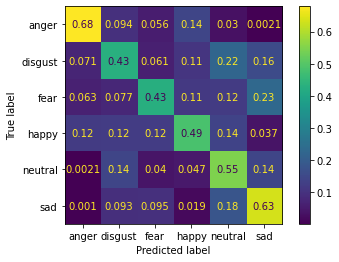

In [50]:
labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [28]:
kfold = KFold(n_splits=20, shuffle=True)
inputs = x_train
targets = y_train


# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [29]:
inputs.shape, targets.shape

((16744, 162, 1), (16744, 6))

In [30]:
model=create_cnn_with_drop ()
print(inputs[838,:5])
print(targets[838])
i=1
for train, test in kfold.split(inputs):

    history=model.fit(inputs[train], targets[train], batch_size=64, epochs=10, validation_split = 0.1, callbacks= [rlrp], verbose = 1)

    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    print(i)
    i+=1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 81, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 41, 128)          

2021-12-09 16:49:14.438014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - ETA: 0s - loss: 1.6572 - accuracy: 0.2898

2021-12-09 16:49:18.463070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
plt.plot(acc_per_fold)
plt.ylabel("accuracy %")

plt.xlabel("# of folds")
plt.show()

In [ ]:
sum(acc_per_fold)/20

In [ ]:
pred = model.predict(x_train)
pred_test = model.predict(x_test)

print("accuracy score for Train set is:", accuracy_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1)))
print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))

In [ ]:
cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
cm = cm/ cm.astype(np.float64).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [44]:
def replicate_vgg_ish ( ) :
    model = Sequential()
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))    
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    
    model.add(Dropout(0.45))
        
    model.add(Conv1D(128, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv1D(256, kernel_size=2, strides=2, padding='same', activation='relu'))
    model.add(Conv1D(256, kernel_size=2, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=6, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    model.summary()
    return model

In [338]:
vgg = replicate_vgg_ish()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 160, 64)           384       
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 160, 64)           20544     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 80, 64)            0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 80, 64)            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 40, 128)           24704     
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 20, 128)           49280     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 10, 128)         

In [339]:
history=vgg.fit(x_train, y_train, batch_size=512, epochs=100, validation_split = 0.1)#, callbacks= [rlrp]) 

Epoch 1/100


2021-12-10 11:13:23.223719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 50ms/step - loss: 1.7029 - accuracy: 0.2451 - val_loss: 1.6253 - val_accuracy: 0.3081


2021-12-10 11:13:24.915454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
30/30 [==============================] - 1s 39ms/step - loss: 1.6077 - accuracy: 0.3109 - val_loss: 1.5665 - val_accuracy: 0.3469
Epoch 3/100
30/30 [==============================] - 1s 38ms/step - loss: 1.5717 - accuracy: 0.3252 - val_loss: 1.5051 - val_accuracy: 0.3469
Epoch 4/100
30/30 [==============================] - 1s 39ms/step - loss: 1.5474 - accuracy: 0.3354 - val_loss: 1.4926 - val_accuracy: 0.3642
Epoch 5/100
30/30 [==============================] - 1s 39ms/step - loss: 1.5286 - accuracy: 0.3512 - val_loss: 1.4668 - val_accuracy: 0.3773
Epoch 6/100
30/30 [==============================] - 1s 39ms/step - loss: 1.5163 - accuracy: 0.3570 - val_loss: 1.4502 - val_accuracy: 0.3869
Epoch 7/100
30/30 [==============================] - 1s 38ms/step - loss: 1.5027 - accuracy: 0.3679 - val_loss: 1.4302 - val_accuracy: 0.4096
Epoch 8/100
30/30 [==============================] - 1s 39ms/step - loss: 1.4856 - accuracy: 0.3750 - val_loss: 1.4270 - val_accuracy: 0.4245
Epoch 

30/30 [==============================] - 1s 39ms/step - loss: 1.1524 - accuracy: 0.5450 - val_loss: 1.1784 - val_accuracy: 0.5343
Epoch 60/100
30/30 [==============================] - 1s 38ms/step - loss: 1.1433 - accuracy: 0.5523 - val_loss: 1.1925 - val_accuracy: 0.5290
Epoch 61/100
30/30 [==============================] - 1s 38ms/step - loss: 1.1392 - accuracy: 0.5548 - val_loss: 1.1926 - val_accuracy: 0.5200
Epoch 62/100
30/30 [==============================] - 1s 39ms/step - loss: 1.1454 - accuracy: 0.5468 - val_loss: 1.1824 - val_accuracy: 0.5307
Epoch 63/100
30/30 [==============================] - 1s 38ms/step - loss: 1.1298 - accuracy: 0.5541 - val_loss: 1.2141 - val_accuracy: 0.5313
Epoch 64/100
30/30 [==============================] - 1s 38ms/step - loss: 1.1292 - accuracy: 0.5556 - val_loss: 1.1949 - val_accuracy: 0.5224
Epoch 65/100
30/30 [==============================] - 1s 39ms/step - loss: 1.1236 - accuracy: 0.5594 - val_loss: 1.1861 - val_accuracy: 0.5451
Epoch 66/100

accuracy score for Train set is: 0.7547181079789775
accuracy score for Test set is:  0.5180938731637406
[Anger, disgust, fear, happy, neutral, sad]
F1 score for Train set is: [0.87890488 0.68490851 0.74207811 0.77755511 0.71590449 0.72849012]
F1 score for Test set is:  [0.6805485  0.43762183 0.47161572 0.48553602 0.46222222 0.55651292]


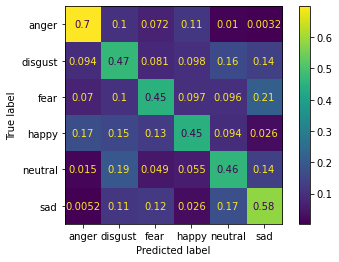

In [358]:
pred = vgg.predict(x_train)
pred_test = vgg.predict(x_test)

print("accuracy score for Train set is:", accuracy_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1)))
print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))

labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad']
cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
cm = cm/ cm.astype(np.float64).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [351]:
Features_Erica = pd.read_csv("features_erica.csv")

In [352]:
X = Features_Erica.iloc [:,:-3].values
Y = Features_Erica['labels'].values

In [353]:
x_test = scaler.transform(X)
x_test = np.expand_dims(x_test,axis = 2)
y_test1 = []
encoder = OneHotEncoder ()
y_test1[0:3] = [0] *3
y_test1[3:6] = [3] *3
y_test1[6:9] = [0] *3
y_test1[9:12] = [3] *3

In [354]:
pred_test = vgg.predict(x_test)
print(np.argmax(pred_test,axis = 1))
print(np.array(y_test1).T)
print("accuracy score for Train set is:", accuracy_score(np.array(y_test1).T[:6], np.argmax(pred_test,axis=1)[:6]))
print("accuracy score for Train set is:", accuracy_score(np.array(y_test1).T[6:12], np.argmax(pred_test,axis=1)[6:12]))
#print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
#print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
#print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))

labels = ['angry', 'happy']
#cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
#cm = cm/ cm.astype(np.float64).sum(axis=1)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
#disp.plot()

[0 0 0 0 0 0 0 0 0 2 2 3]
[0 0 0 3 3 3 0 0 0 3 3 3]
accuracy score for Train set is: 0.5
accuracy score for Train set is: 0.6666666666666666
[Anger, disgust, fear, happy, neutral, sad]


In [355]:
Features_other = pd.read_csv("features_other.csv")

X = Features_other.iloc [:,:-3].values
Y = Features_other['labels'].values

x_test = scaler.transform(X)
x_test = np.expand_dims(x_test,axis = 2)

pred_test = vgg.predict(x_test)


print("[angry, fear, happy, fear, fear, happy]")
print(np.argmax(pred_test,axis = 1))

[angry, fear, happy, fear, fear, happy]
[2 2 0 3 2 3]


In [301]:
def mlp ():
    model = Sequential ()
    model.add(Dense(units = 1600, input_shape = (x_train.shape[1],), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 100, activation = 'relu'))
    model.add(Dropout(0.34))
    model.add(Dense(units = 20, activation = 'relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(units = 6, activation = 'softmax'))
    
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    model.summary()
    
    return model

In [302]:
mlp_model = mlp()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 1600)              257600    
_________________________________________________________________
dropout_79 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 100)               160100    
_________________________________________________________________
dropout_80 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 20)                2020      
_________________________________________________________________
dense_144 (Dense)            (None, 6)                 126       
Total params: 419,846
Trainable params: 419,846
Non-trainable params: 0
_______________________________________________

In [303]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.4, verbose=1, patience=2, min_lr=0.00001)
mlp_history = mlp_model.fit(x_train,y_train, epochs = 40, batch_size = 22000, verbose = 1, validation_split = 0.1)#,callbacks = [rlrp])

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 11.2133 - accuracy: 0.1739

2021-12-10 00:19:56.010939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 403ms/step - loss: 11.2133 - accuracy: 0.1739 - val_loss: 10.1438 - val_accuracy: 0.1666
Epoch 2/40
1/1 [==============================] - 0s 67ms/step - loss: 12.4247 - accuracy: 0.1738 - val_loss: 4.1422 - val_accuracy: 0.1612
Epoch 3/40
1/1 [==============================] - 0s 81ms/step - loss: 7.0376 - accuracy: 0.1729 - val_loss: 2.1463 - val_accuracy: 0.1994


2021-12-10 00:19:56.250015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/40
1/1 [==============================] - 0s 61ms/step - loss: 4.1458 - accuracy: 0.1800 - val_loss: 1.7830 - val_accuracy: 0.1534
Epoch 5/40
1/1 [==============================] - 0s 59ms/step - loss: 3.2305 - accuracy: 0.1816 - val_loss: 1.7831 - val_accuracy: 0.1707
Epoch 6/40
1/1 [==============================] - 0s 56ms/step - loss: 2.8813 - accuracy: 0.1753 - val_loss: 1.7814 - val_accuracy: 0.1713
Epoch 7/40
1/1 [==============================] - 0s 58ms/step - loss: 2.6968 - accuracy: 0.1781 - val_loss: 1.7798 - val_accuracy: 0.1749
Epoch 8/40
1/1 [==============================] - 0s 58ms/step - loss: 2.6841 - accuracy: 0.1804 - val_loss: 1.7775 - val_accuracy: 0.1749
Epoch 9/40
1/1 [==============================] - 0s 62ms/step - loss: 2.6220 - accuracy: 0.1808 - val_loss: 1.7760 - val_accuracy: 0.1755
Epoch 10/40
1/1 [==============================] - 0s 60ms/step - loss: 2.6380 - accuracy: 0.1748 - val_loss: 1.7748 - val_accuracy: 0.1791
Epoch 11/40
1/1 [=========

In [304]:
mlp_model.evaluate(x_test,y_test)

175/175 [==============================] - 1s 7ms/step - loss: 1.7591 - accuracy: 0.1974


[1.759116530418396, 0.19742028415203094]

2021-12-09 23:57:08.381265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


accuracy score for Train set is: 0.8493788819875776
accuracy score for Test set is:  0.6148333930490864
[Anger, disgust, fear, happy, neutral, sad]
F1 score for Train set is: [0.93307227 0.82937365 0.81813074 0.87755102 0.83702374 0.804266  ]
F1 score for Test set is:  [0.76597993 0.532382   0.54152446 0.60794844 0.58556947 0.64033457]


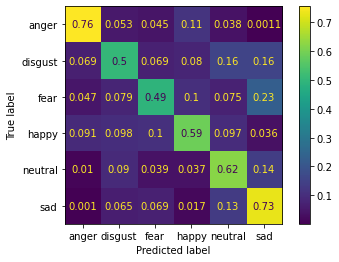

In [230]:
pred = mlp_model.predict(x_train)
pred_test = mlp_model.predict(x_test)

print("accuracy score for Train set is:", accuracy_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1)))
print("accuracy score for Test set is: ", accuracy_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1)))
print("[Anger, disgust, fear, happy, neutral, sad]")
print("F1 score for Train set is:", f1_score(np.argmax(y_train,axis =1), np.argmax(pred,axis=1), average = None))
print("F1 score for Test set is: ", f1_score(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1), average = None))
labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad']
cm = confusion_matrix(np.argmax(y_test,axis =1), np.argmax(pred_test,axis=1))
cm = cm/ cm.astype(np.float64).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

(16744, 160)